# Beer Recommendation system
Building a recommendation system (collaborative) for an online beer store, where customers will be recommended the beer that they are most likely to buy based on the data about the ratings that the customers have given in the past. 

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Reading beer_data file
beer_data=pd.read_csv('C:/DataScienceUpgrad/Main Course/Domain Elective/Module 6-Assignment - Recommendation Systems/beer_data.csv',encoding='latin-1')

In [2]:
beer_data.head()

,beer_beerid,review_profilename,review_overall
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


## Inspecting the Dataframe

In [3]:
beer_data.shape

(475984, 3)

In [4]:
beer_data.describe()

,beer_beerid,review_overall
count,475984.000000,475984.000000
mean,21660.550611,3.814827
std,21793.437326,0.720411
min,3.000000,0.000000
25%,1716.000000,3.500000
50%,13892.000000,4.000000
75%,39397.000000,4.500000
max,77317.000000,5.000000


## Data Cleaning 

In [5]:
# Changing the column names 
beer_data.columns=['beerId', 'userName', 'rating']
beer_data.head()

,beerId,userName,rating
0,48215,stcules,3.0
1,52159,oline73,3.0
2,52159,alpinebryant,3.0
3,52159,rawthar,4.0
4,52159,RangerClegg,3.5


In [6]:
# Let's check % of missing values in each column of beer_data dataframe.
((beer_data.isna().mean()*100).round(2)).sort_values(ascending=False)

userName    0.02
rating      0.00
beerId      0.00
dtype: float64

In [7]:
# .02% rows have missing values in userName column. Lets remove such rows
beer_data.dropna(inplace=True)

In [8]:
# removing duplicates (if one user reviewed the same beer multiple times) except the last one
beer_data_cleaned=beer_data[~beer_data.duplicated(['beerId','userName'],keep='last')]
beer_data_cleaned.shape

(474462, 3)

## Data Preperation
removing those beers which have recieved very low number of ratings

In [9]:
# checking the distribution of value count of ratings for each beer
beer_data_cleaned.beerId.value_counts().describe()

count    40304.000000
mean        11.772082
std         41.888449
min          1.000000
25%          1.000000
50%          2.000000
75%          5.000000
max        977.000000
Name: beerId, dtype: float64

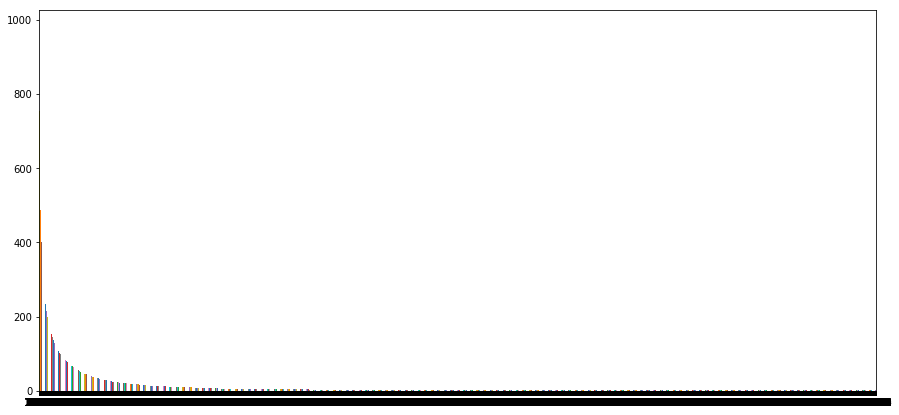

In [10]:
# Lets visualize the count plot
beer_data_cleaned.beerId.value_counts().sort_values(ascending=False).plot(kind='bar',rot=0, figsize=(15,7))


In [11]:
# from the above distribution and plot we can see that 75 percentile of beers have 5 or less number of ratings and average count is 11.
# lets choose min number of ratings that should be available for beers to consider in analysis is 10 and emove the beers which have less than 10 ratings
beer_data_final=beer_data_cleaned.groupby('beerId').filter(lambda x : len(x)>=10)
beer_data_final.shape

(400450, 3)

## Data Exploration

In [12]:
# Unique values of ratings
beer_data_final.rating.unique()

array([4.5, 4. , 3. , 3.5, 2.5, 5. , 2. , 1.5, 1. ])

#### Average Beer Ratings

In [13]:
# average beer ratings
beer_data_final.groupby('beerId').mean().sort_values(['rating'],ascending=False).head(5)

,rating
beerId,
63649,4.875000
44910,4.866667
68548,4.789474
70356,4.750000
58610,4.722222


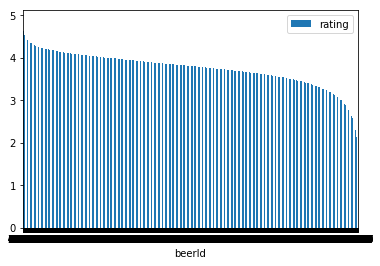

In [14]:
# plotting average beer ratings in descending order

avg_beer_rating_df=beer_data_final.groupby('beerId').mean().sort_values(['rating'],ascending=False)
avg_beer_rating_df.plot(kind='bar',rot=0)

#### Average User Ratings

In [15]:
# Average user rating
beer_data_final.groupby('userName')['rating'].mean().sort_values(ascending=False).head(5)

userName
zzajjber      5.0
bellan01      5.0
beernerd67    5.0
beeroness     5.0
beersands     5.0
Name: rating, dtype: float64

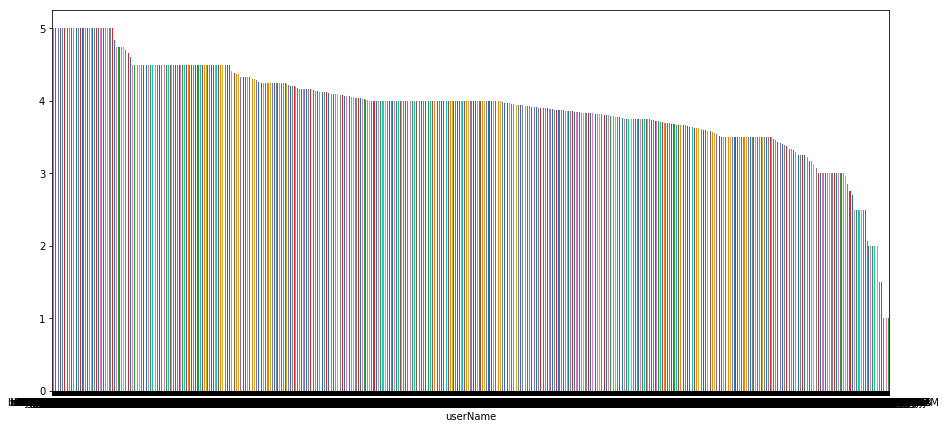

In [16]:
# ploting average user ratings in descending order
avg_user_rating_df=beer_data_final.groupby('userName')['rating'].mean().sort_values(ascending=False)
avg_user_rating_df.plot(kind='bar',rot=0, figsize=(15,7))

#### Total Number of Ratings for Each Beer

In [17]:
# Total number of ratings given to beers
beer_data_final.groupby('beerId').count().sort_values(['rating'],ascending=False).head(5)

,userName,rating
beerId,,
2093,977,977
412,966,966
1904,902,902
1093,840,840
92,812,812


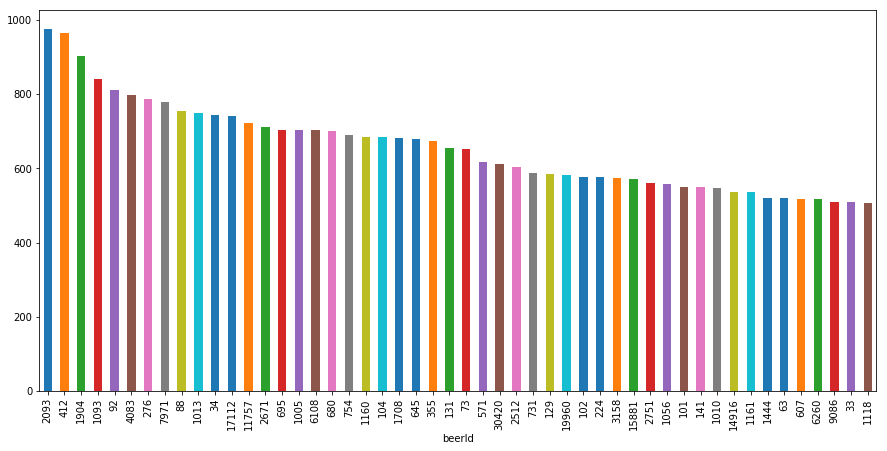

In [18]:
# Visualizing count of ratings given to beers for top 50 beers
beer_data_final.groupby('beerId')['rating'].count().sort_values(ascending=False).head(50).plot(kind='bar',rot=90,figsize=(15,7))

#### Total Number of Ratings by Each User

In [19]:
# total number of ratings given by users
beer_data_final.groupby('userName')['rating'].count().sort_values(ascending=False).head(5)

userName
mikesgroove       1072
BuckeyeNation     1067
northyorksammy    1007
brentk56           833
WesWes             792
Name: rating, dtype: int64

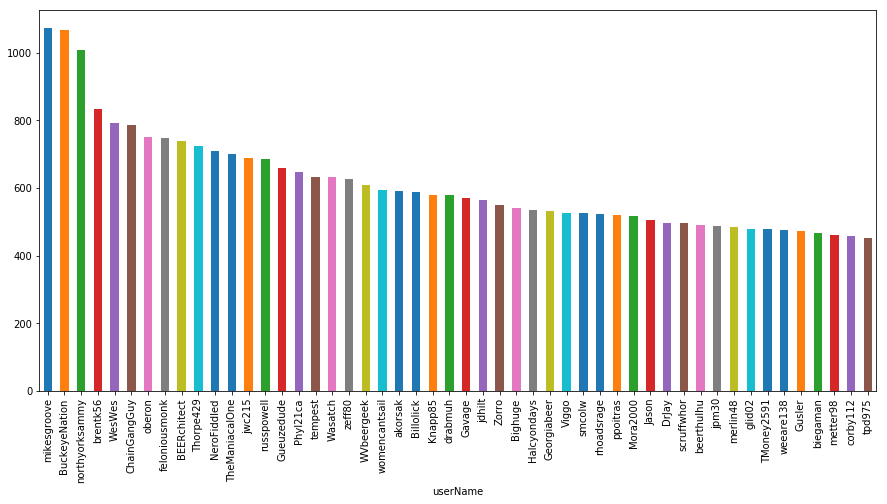

In [20]:
# Plotting number of ratings given by users in descending order for top 50 users
beer_data_final.groupby('userName')['rating'].count().sort_values(ascending=False).head(50).plot(kind='bar',rot=90, figsize=(15,7))

## Train-Test Split

In [21]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(beer_data_final,test_size=0.3,random_state=31)

In [22]:
print(train.shape)
print(test.shape)

(280315, 3)
(120135, 3)


## User based collaborative model

In [23]:
# pivot beer_data_final into beer_features
df_beer_features=train.pivot(
index='userName',
columns='beerId',
values='rating'
)


In [24]:
df_beer_features.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Normalising the rating of the beer for each user around 0 mean

In [25]:
mean=np.nanmean(df_beer_features,axis=1)
df_subtracted=(df_beer_features.T-mean).T

In [26]:
df_subtracted.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01Ryan10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
04101Brewer,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05Harley,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0beerguy0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Copy train and test dataset¶
These dataset will be used for prediction and evaluation.

Dummy train will be used later for prediction of the movies which has not been rated by the user. To ignore the movies rated by the user, we will mark it as 0 during prediction. The movies not rated by user is marked as 1 for prediction.
Dummy test will be used for evaluation. To evaluate, we will only make prediction on the movies rated by the user. So, this is marked as 1. This is just opposite of dummy_train

In [27]:
dummy_train=train.copy()
dummy_test=test.copy()

In [28]:
dummy_train['rating']=dummy_train['rating'].apply(lambda x: 0 if x>=1 else 1)
dummy_test['rating']=dummy_test['rating'].apply(lambda x: 1 if x>=1 else 0)

In [29]:
# the beer not rated by user marked as 1 for prediction
dummy_train=dummy_train.pivot(
index='userName',
columns='beerId',
values='rating'
).fillna(1)

# beer not rated by user marked as 0 for evaluation
dummy_test=dummy_test.pivot(
index='userName',
columns='beerId',
values='rating'
).fillna(0)

In [30]:
dummy_train.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
01Ryan10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
04101Brewer,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
05Harley,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
0beerguy0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [31]:
dummy_test.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### User Similarity matrix

#### Finding Cosine similarity

In [32]:
from sklearn.metrics.pairwise import pairwise_distances
#user similarity matrix
user_correlation=1-pairwise_distances(df_subtracted.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)]=0
print(user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


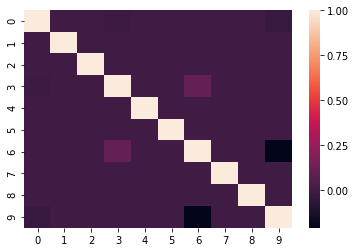

In [34]:
# visualizing first 10 users
# user 7 and 10 are negatively corelated and user 4 and 7 are somewhat positivily related to each other
import seaborn as sns
sns.heatmap(user_correlation[0:10,0:10])

### Prediction

Doing the prediction for the users which are positively related with other users, and not the users which are negatively related as we are interested in the users which are more similar to the current users. So, ignoring the correlation for values less than 0. 

In [35]:
user_correlation[user_correlation<0]=0
user_correlation

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

Rating predicted by the user (for movies rated as well as not rated) is the weighted sum of correlation with the movie rating (as present in the rating dataset). 

In [36]:
user_predicted_ratings=np.dot(user_correlation, df_beer_features.fillna(0))
user_predicted_ratings

array([[9.41129714e-01, 2.70714970e+00, 2.11969401e+00, ...,
        1.78053390e-01, 4.97604333e-01, 1.20483191e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [7.82547169e-01, 3.19567457e+00, 2.08077960e+00, ...,
        8.15765792e-02, 1.79842503e-01, 7.79566429e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [37]:
user_predicted_ratings.shape

(18707, 6939)

Since we are interested only in the beers not rated by the user, we will ignore the beers rated by the user by making it zero.

In [38]:
user_final_ratings=np.multiply(user_predicted_ratings,dummy_train)
user_final_ratings.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.941130,2.707150,2.119694,0.086935,0.177780,2.980502,0.144785,0.211641,0.244891,0.431443,...,2.104090,1.101497,0.488294,0.531403,0.048503,0.299365,1.089653,0.178053,0.497604,0.001205
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,1.764283,2.063444,2.264421,0.145182,0.105898,3.450326,0.267692,0.309209,0.235688,0.644838,...,1.861995,1.477367,0.290177,0.147967,0.126523,0.773649,1.029725,0.045817,0.672763,0.252189
0beerguy0,0.229064,3.076587,0.264572,0.617216,0.511546,2.638068,0.130051,0.472624,0.000000,1.415777,...,0.387439,0.044176,0.000000,0.245496,0.070813,0.000000,0.131188,0.271809,0.155748,0.112295


In [39]:
# Top 5 recommendation for user 1
user_final_ratings.iloc[1].sort_values(ascending=False)[0:5]

beerId
76816    0.0
7850     0.0
7714     0.0
7715     0.0
7728     0.0
Name: 01Ryan10, dtype: float64

## Item Based Collaborative model

In [40]:
# pivot beer_data_final into beer_features_item
df_beer_features_item=train.pivot(
index='beerId',
columns='userName',
values='rating'
)

In [41]:
df_beer_features_item.head()

userName,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beerId,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Normalizing the beer rating for each beer
mean=np.nanmean(df_beer_features_item,axis=1)
df_subtracted_item=(df_beer_features_item.T-mean).T
df_subtracted_item.head()

userName,0110x011,01Ryan10,04101Brewer,05Harley,0beerguy0,0runkp0s,0tt0,1000Bottles,1001111,100floods,...,zulufactor,zumicroom,zwalk8,zwan,zymrgy,zymurgy4all,zymurgywhiz,zythus,zyzygy,zzajjber
beerId,,,,,,,,,,,,,,,,,,,,,
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Item similarity matrix

In [43]:
item_correlation=1-pairwise_distances(df_subtracted_item.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

[[ 1.          0.01668043  0.00670663 ...  0.         -0.00534306
   0.        ]
 [ 0.01668043  1.         -0.04289887 ...  0.          0.
   0.        ]
 [ 0.00670663 -0.04289887  1.         ...  0.          0.01899946
   0.        ]
 ...
 [ 0.          0.          0.         ...  1.          0.
   0.        ]
 [-0.00534306  0.          0.01899946 ...  0.          1.
   0.37319525]
 [ 0.          0.          0.         ...  0.          0.37319525
   1.        ]]


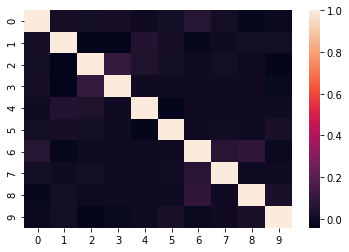

In [44]:
# visualizing similarity between 1st 10 beers

import seaborn as sns
sns.heatmap(item_correlation[0:10,0:10])


we can see from above plot 1st 10 beers have very low similarity with each other

In [45]:
# Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation<0]=0
item_correlation

array([[1.        , 0.01668043, 0.00670663, ..., 0.        , 0.        ,
        0.        ],
       [0.01668043, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.00670663, 0.        , 1.        , ..., 0.        , 0.01899946,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01899946, ..., 0.        , 1.        ,
        0.37319525],
       [0.        , 0.        , 0.        , ..., 0.        , 0.37319525,
        1.        ]])

### Prediction

In [46]:
item_predicted_ratings=np.dot(item_correlation,df_beer_features_item.fillna(0)).T
item_predicted_ratings

array([[0.23782879, 0.61045291, 1.10698841, ..., 0.        , 0.31511971,
        0.0980482 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.09953383, 0.00949313, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.0667248 , 0.02297521, 0.23880218, ..., 0.        , 0.00234914,
        0.        ],
       [0.        , 0.        , 0.10848322, ..., 0.        , 0.00702767,
        0.        ],
       [0.06441221, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [47]:
item_predicted_ratings.shape

(18707, 6939)

In [48]:
dummy_train.shape

(18707, 6939)

In [49]:
#filtering the predicted ratings only for beers not rated by users
item_final_rating=np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.237829,0.610453,1.106988,0.363856,0.281387,1.121746,0.768528,0.613884,0.488121,0.512754,...,1.219430,0.373097,0.484495,0.562193,0.414044,0.384722,1.036657,0.000000,0.315120,0.098048
01Ryan10,0.000000,0.000000,0.000000,0.000000,0.101243,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.161710,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
04101Brewer,0.000000,0.099534,0.009493,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.105612,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
05Harley,0.251906,0.659763,0.592622,0.973764,0.468647,0.528893,0.149178,0.248775,0.492216,0.234250,...,1.689791,0.253241,0.315779,1.482390,0.038381,0.089291,1.372287,0.177526,0.170738,0.256568
0beerguy0,0.223165,0.216438,0.036896,0.000000,0.028811,0.272106,0.050822,0.000000,0.000729,0.169348,...,0.205528,0.021141,0.000000,0.120348,0.018018,0.000000,0.210186,0.000000,0.000000,0.000000


#### Top 5 prediction for user 1

In [50]:
item_final_rating.iloc[1].sort_values(ascending=False)[0:5]

beerId
67471    1.531968
65924    1.257052
46365    0.843459
28985    0.733006
5580     0.712612
Name: 01Ryan10, dtype: float64

### Evaluation

#### Using user similarity matrix

In [51]:
test_beer_features=test.pivot(
index='userName',
columns='beerId',
values='rating')

mean=np.nanmean(test_beer_features, axis=1)
test_beer_subtracted=(test_beer_features.T-mean).T

# User Similarity Matrix
test_user_correlation = 1 - pairwise_distances(test_beer_subtracted.fillna(0), metric='cosine')
test_user_correlation[np.isnan(test_user_correlation)] = 0
print(test_user_correlation)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [52]:
test_user_correlation[test_user_correlation<0]=0
test_user_predicted_ratings = np.dot(test_user_correlation, test_beer_features.fillna(0))
test_user_predicted_ratings

array([[0.12179402, 0.05290243, 0.04931114, ..., 0.        , 0.        ,
        0.        ],
       [0.02347972, 0.37503695, 0.03541121, ..., 0.        , 0.        ,
        0.39729516],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.13948779, 0.22147554, 1.26947838, ..., 0.11752822, 0.        ,
        0.33255958],
       [0.37564608, 1.07486877, 0.545206  , ..., 0.        , 0.        ,
        0.        ]])

In [53]:
# filtering predictions only for beers rated by users
test_user_final_rating = np.multiply(test_user_predicted_ratings,dummy_test)
test_user_final_rating.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### RMSE

In [54]:
# Calculating the RMSE for only the movies rated by user. For RMSE, normalising the rating to (1,5) range.
from sklearn.preprocessing import MinMaxScaler
from numpy import *

X  = test_user_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(copy=True, feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [55]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

In [56]:
rmse = (sum(sum((test_beer_features - y )**2))/total_non_nan)**0.5
print(rmse)

1.8553272292706027


#### Using item similarity matrix

In [57]:
test_beer_features = test.pivot(
    index='userName',
    columns='beerId',
    values='rating'
).T

mean = np.nanmean(test_beer_features, axis=1)
test_df_subtracted = (test_beer_features.T-mean).T

test_item_correlation = 1 - pairwise_distances(test_df_subtracted.fillna(0), metric='cosine')
test_item_correlation[np.isnan(test_item_correlation)] = 0
test_item_correlation[test_item_correlation<0]=0

In [58]:
test_item_correlation.shape

(6905, 6905)

In [59]:
test_beer_features.shape

(6905, 13706)

In [60]:
test_item_predicted_ratings = (np.dot(test_item_correlation, test_beer_features.fillna(0))).T
test_item_final_rating = np.multiply(test_item_predicted_ratings,dummy_test)
test_item_final_rating.head()

beerId,5,6,7,8,9,10,11,12,13,14,...,75013,75086,75160,75188,75230,75894,76144,76323,76525,76816
userName,,,,,,,,,,,,,,,,,,,,,
0110x011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
05Harley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0beerguy0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0tt0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000Bottles,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### RMSE

In [61]:
test_ = test.pivot(
    index='userName',
    columns='beerId',
    values='rating'
)

In [64]:
X  = test_item_final_rating.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))

MemoryError: 

In [65]:
rmse = (sum(sum((test_ - y )**2))/total_non_nan)**0.5
print(rmse)

MemoryError: 

RMSE value is low for item based similarity model so we should deploy this model. 

### Top 5 recommendation to users 'cokes', 'genog' and 'giblet'

In [66]:
item_final_rating.loc['cokes',:].sort_values(ascending=False)[0:5]

beerId
2219     20.158880
366      17.212990
56396    16.883126
28268    16.691473
1000     16.596119
Name: cokes, dtype: float64

In [67]:
item_final_rating.loc['genog',:].sort_values(ascending=False)[0:5]

beerId
38774    7.963453
39965    7.207050
34363    7.194722
58843    6.857183
34362    6.560758
Name: genog, dtype: float64

In [68]:
item_final_rating.loc['giblet',:].sort_values(ascending=False)[0:5]

beerId
6687     4.774472
3699     4.643822
41524    4.540327
995      4.390234
3035     4.372260
Name: giblet, dtype: float64